#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [4]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd


##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

In [951]:
from numpy.linalg import inv
A = np.matrix('3,5,9;3,3,4;5,9,17')
B = np.matrix ('2;1;4')
x = inv(A)*B
np.set_printoptions(suppress=True)
print "The solution to x in Ax=B equation is:\n", x


The solution to x in Ax=B equation is:
[[ 1.]
 [-2.]
 [ 1.]]


Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [952]:
#A*B using nested for loops
def Mat_Mul(A,B):
    C = np.empty([A.shape[0],B.shape[1]])
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i,j]+=(A[i,k]*B[k,j])
    return C


A = np.matrix('3,5,9;3,3,4;5,9,17')
B = np.matrix ('2;1;4')
print "A*B using nested for loops is:\n" ,Mat_Mul(A,B)


A*B using nested for loops is:
[[ 47.]
 [ 25.]
 [ 87.]]


In [953]:
#A*B using numpy's built in martrix multiplication
A = np.matrix('3,5,9;3,3,4;5,9,17')
B = np.matrix ('2;1;4')
C = np.empty([A.shape[0],B.shape[1]])
C=np.dot(A,B)

print "A*B using numpy's built in martrix multiplication is:\n", C

A*B using numpy's built in martrix multiplication is:
[[47]
 [25]
 [87]]


In [955]:
#skipped this part as suggested by the instructor
#A*B using Cython
import Cython

Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

Populating the interactive namespace from numpy and matplotlib


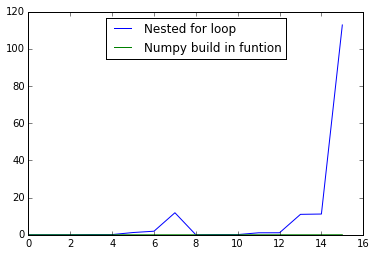

In [996]:
%pylab inline
import time
import pylab as pl
Mat_Mul_Speed = []
Numpy_Mat_Mul_Speed = []
####I had to reduce the matric size as I couldn't get any results for anything larger####
for a in [10,100]:
    for b in [10,100,1000,10000]:
        for c in [10,100]:
            D = np.random.random((a,b))
            E = np.random.random((b,c))
            ####timing the nested for loop####
            t1=time.time()
            Mat_Mul(D,E)
            t2=time.time()
            Mat_Mul_Speed.append(t2-t1)
            ####timing the built in function####
            t11=time.time()
            np.dot(D,E)
            t22=time.time()
            Numpy_Mat_Mul_Speed.append(t22-t11)

pl.figure()            
pl.plot(Mat_Mul_Speed, label='Nested for loop')
pl.plot(Numpy_Mat_Mul_Speed, label='Numpy build in funtion')
plt.legend(loc='upper center')


**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

In [978]:
####Determinant using the built in function####
A = np.matrix('3,5,9;3,3,4;5,9,17')
print "Determinant of Matrix A is:\n",np.linalg.det(A)

Determinant of Matrix A is:
-2.0


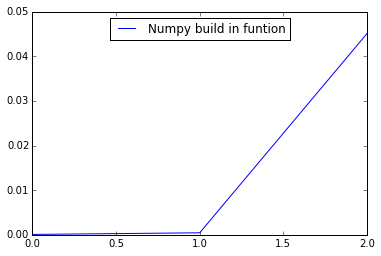

In [982]:
####Computing Determinant using for loop even for a 5x5 matrix will be a nightmare, so skipped the nested for loop part####
Numpy_Det_Speed = []
for a in [10,100,1000]:
    for b in [10,100,1000]:
        if a==b: 
            D = np.random.random((a,b))
            ####timing the built in function####
            t111=time.time()
            np.linalg.det(D)
            t222=time.time()
            Numpy_Det_Speed.append(t222-t111)

pl.figure()            
pl.plot(Numpy_Det_Speed, label='Numpy build in funtion')
plt.legend(loc='upper center')

###IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Tuple
2. Set

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [7]:
import pickle
import gzip
import json
#########part 1############
datatypes=dict([('object','dictionary'),('array','list'),('string','string'),('integer','integer'),
                ('realnumber','float'),('true','True'),('false','False'),('null','None')])
#########part 2############
pickle.dump(datatypes,open('pickle.pkl','wb'))
pickle.dump(datatypes,gzip.open('pickle.pkl','wb'))
#########part 3############
DataTypes = pickle.load(gzip.open('pickle.pkl','rb'))
for (JSON, PYTHON3) in DataTypes.iteritems():
    print "The JSON equivalent for the %10s datatype Dictionary is %10s" %(PYTHON3,JSON)
#########part 4############
datatypes_reversed={}
for (JSON, PYTHON3) in DataTypes.iteritems():
    datatypes_reversed[PYTHON3]=JSON
json.dump(datatypes_reversed, open('json.jsn','wb'))

The JSON equivalent for the      False datatype Dictionary is      false
The JSON equivalent for the     string datatype Dictionary is     string
The JSON equivalent for the dictionary datatype Dictionary is     object
The JSON equivalent for the    integer datatype Dictionary is    integer
The JSON equivalent for the       list datatype Dictionary is      array
The JSON equivalent for the       None datatype Dictionary is       null
The JSON equivalent for the       True datatype Dictionary is       true
The JSON equivalent for the      float datatype Dictionary is realnumber


##Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


###Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [8]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [9]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                   DOCUMENTATION TO ACCOMPANY                       |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|                                                                    |
|          The

In [10]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt



EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

    INFORMATION LISTED BELOW IS AVAILABLE UNDER THE TERMS OF THE  
                      CONFIDENTIALITY AGREEMENT                

EPSILON CONFIDENTIAL      EPSILON CONFIDENTIAL    EPSILON CONFIDENTIAL

+--------------------------------------------------------------------+
|                PARALYZED VETERANS OF AMERICA (PVA)                 |
|                  DATA DICTIONARY TO ACCOMPANY                      |
|                                                                    |
|                          KDD-CUP-98                                |
|                                                                    |
|          The Second International Knowledge Discovery and          |
|                 Data Mining Tools Competition                      |
|                                                                    |
|                Held in Conjunction with KDD-98                     |
|           

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [987]:
%cd ~/Documents/DSE/phesami/DSE200
!touch .gitignore
!git add .gitignore 
!git commit -m "Adding Documents/DSE/phesami/DSE200/data/ to the gitignore file"

/Users/phesami/Documents/DSE/phesami/DSE200
On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)
Changes not staged for commit:
	modified:   data/NLTK/BrownNews.txt
	modified:   day_1_python_and_unix/.DS_Store
	modified:   day_1_python_and_unix/.ipynb_checkpoints/1_pregnancy_length_analysis-checkpoint.ipynb
	modified:   day_1_python_and_unix/.ipynb_checkpoints/2_python_basics-checkpoint.ipynb
	modified:   day_1_python_and_unix/.ipynb_checkpoints/3_python_basics_excercises-checkpoint.ipynb
	modified:   day_1_python_and_unix/.ipynb_checkpoints/4_unix,_sys,_and_os-checkpoint.ipynb
	modified:   day_1_python_and_unix/.ipynb_checkpoints/5_unix_exercises-checkpoint.ipynb
	modified:   day_1_python_and_unix/1_pregnancy_length_analysis.ipynb
	modified:   day_1_python_and_unix/2_python_basics.ipynb
	modified:   day_1_python_and_unix/3_python_basics_excercises.ipynb
	modified:   day_1_python_and_unix/4_unix,_sys,_and_os.ipynb
	modi

In [1000]:
%cd ~/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/
!mkdir data
%cd data/
!curl -o zipped http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
!unzip zipped
!rm zipped

/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas
/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34.7M  100 34.7M    0     0  3238k      0  0:00:10  0:00:10 --:--:-- 3223k
Archive:  zipped
  inflating: cup98LRN.txt            


Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [990]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
#########Part 1############
Cup98_Data = open('cup98LRN.txt', 'rb')
sum(1 for line in Cup98_Data)
Cup98_Data.close()
#########Part 2############
Cup98_Data = open('cup98LRN.txt', 'rb')
for i in range(2):
    print Cup98_Data.readline()
Cup98_Data.close()


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,

In [991]:
#########Part 3############
Cup98_Data = open('cup98LRN.txt', 'rb')
Num_of_Fields = len(Cup98_Data.readline().split(','))
Num_of_Fields

481

In [992]:
#########Part 4############
Missing_Data_Rows = False
Cup98_Data = open('cup98LRN.txt', 'rb')
for line in Cup98_Data:
    if (len(line.split(',')) != Num_of_Fields):
        print line
        Missing_Data_Rows = True
        break
print "Any rows with number of fields that differes from header's number of fields?", Missing_Data_Rows

Any rows with number of fields that differes from header's number of fields? False


Give answers to questions 1-4 in this markdown cell:

1. 95413
2. Character (comma) seperated 
3. Yes, 481
4. Yes
5. Yes, number of lines in readme file has been indicated as 95412

Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [1001]:
import pandas as pd
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
Cup98_Data = open('cup98LRN.txt', 'rb')
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]
column=[col_types[i][0] for i in range(len(col_types))]
data_separated = [lines.strip().split(',') for lines in Cup98_Data.readlines()]
learn = pd.DataFrame (data = data_separated[1:], columns=column)


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas


In [1004]:
learn_y =learn[['TARGET_B','TARGET_D']]
learn_x=learn.drop(['TARGET_B','TARGET_D'], axis=1)
learn_y.head()


,TARGET_B,TARGET_D
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [1008]:
dict_file = open("dict.dat")
col_types_dict = dict([ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ])
def Summary_of_Table (table):
    for col in table.columns:
        ####Check if it's numerical column and then calculate the statistics#####
        if (col_types_dict[col]=='Num'):
            mean_col = table[[col]].convert_objects(convert_numeric=True).mean(axis=0)[0]
            std_dev_col = table[[col]].convert_objects(convert_numeric=True).std(axis=0)[0]
            min_col = table[[col]].convert_objects(convert_numeric=True).min(axis=0)[0]
            max_col = table[[col]].convert_objects(convert_numeric=True).max(axis=0)[0]
            miss_val = len(table[[col]])-table[[col]].count(axis=0)[0]+table[col].sum(axis=0).count('Inf')
            print col,"\n","mean:",mean_col,"\n","std_dev:", std_dev_col,"\n","min:",min_col,"\n",\
            "max:",max_col,"\n","missing:",miss_val,"\n"
        ####check to see if its char type and then find the 3 most common and 3 least common####
        elif (col_types_dict[col]=='Char'):
            Num_dist_Val = table[col].nunique()
            miss_val_char = len(table[[col]])-table[[col]].count(axis=0)[0]+table[col].sum(axis=0).count(' ')+\
            table[col].sum(axis=0).count('Inf')
            print col,"\n","distinct_values:",Num_dist_Val,"\n","missing:",miss_val_char,"\n\n", "3 most common:\n",\
            table[col].value_counts().head(3),"\n\n","3 least common:\n",table[col].value_counts().tail(3),"\n"

Summary_of_Table(learn_y)
####selected a few columns to be shown####
Summary_of_Table(learn_x[['OSOURCE','ODATEDW','TCODE','STATE','ZIP']])



TARGET_B 
mean: 0.0507588144049 
std_dev: 0.219505950177 
min: 0 
max: 1 
missing: 0 

TARGET_D 
mean: 0.79307319834 
std_dev: 4.42972507366 
min: 0.0 
max: 200.0 
missing: 0 

OSOURCE 
distinct_values: 896 
missing: 928 

3 most common:
MBC    4539
SYN    3563
AML    3430
dtype: int64 

3 least common:
TMT    1
NHE    1
BBO    1
dtype: int64 

ODATEDW 
mean: 9141.36325619 
std_dev: 343.45475236 
min: 8306 
max: 9701 
missing: 0 

TCODE 
mean: 54.2231165891 
std_dev: 953.844475829 
min: 0 
max: 72002 
missing: 0 

STATE 
distinct_values: 57 
missing: 0 

3 most common:
CA    17343
FL     8376
TX     7535
dtype: int64 

3 least common:
DE    3
AS    1
DC    1
dtype: int64 

ZIP 
distinct_values: 19938 
missing: 0 

3 most common:
85351    61
92653    59
85710    54
dtype: int64 

3 least common:
73117     1
61732     1
90731-    1
dtype: int64 



 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [1]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
!curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data 


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   230k      0 --:--:-- --:--:-- --:--:--  230k


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [2]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
####Using regular expression to extract data for the date July 24 2005 having flow id=7####
sel_data=!grep ^7,07/24/05 CalIt2.data
print "number of rows of data for the date July 24 2005 having flow id=7 is:\n", len(sel_data)


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
number of rows of data for the date July 24 2005 having flow id=7 is:
48


In [5]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
from operator import itemgetter
sel_data_count = !grep [^0-5]$ CalIt2.data
sel_data_count_sep = [sel_data_count[i].split(',') for i in range(len(sel_data_count))]
sel_data_sorted = sorted(sel_data_count_sep, key=lambda x: int(x[3]), reverse=True)
print "Rows whose count is greater than 5:\n" 
pd.DataFrame(data=sel_data_sorted[0:10], columns=['FlowID', 'Date', 'Time', 'Count'])

/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
Rows whose count is greater than 5:



,FlowID,Date,Time,Count
0,7,10/03/05,16:00:00,49
1,7,08/30/05,17:00:00,47
2,9,11/01/05,21:00:00,46
3,9,08/18/05,13:00:00,39
4,7,08/18/05,15:30:00,39
5,7,08/18/05,12:00:00,38
6,7,08/18/05,17:00:00,38
7,9,10/07/05,14:00:00,38
8,9,09/01/05,15:00:00,37
9,7,11/01/05,20:00:00,37


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [6]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
sel_data_DF= pd.DataFrame(data=sel_data_sorted[0:10], columns=['FlowID', 'Date', 'Time', 'Count'])
###finding the lowest value of 10####
min_count=int(sel_data_DF['Count'].min(axis=0))
####subtracting lowest value of the 10 from all other rows###
sel_data_DF['Count'] = sel_data_DF.Count.apply(lambda x:int(x)-min_count)
####calculating the average value of the resulting counts####
print "average value of the resulting counts is:\n", sel_data_DF['Count'].mean(axis=0)


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
average value of the resulting counts is:
3.8


In [9]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
####calculating the sum all counts with flow_id=9 and date is 07/24/05####
Orig_data= !cat CalIt2.data
Orig_data_sep = [Orig_data[i].split(',') for i in range(len(Orig_data))]
data_DF= pd.DataFrame(data=Orig_data_sep, columns=['FlowID', 'Date', 'Time', 'Count'])
####finding all rows with flow_id=9 and date is 07/24/05####
data_DF_sel = data_DF.loc[data_DF['FlowID']=='9'].loc[data_DF['Date']=='07/24/05']
####converting the data t integer and summ all counts####
print "sum all counts with flow_id=9 and date is 07/24/05 is: \n"\
        ,data_DF_sel['Count'].convert_objects(convert_numeric=True).sum(axis=0)


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
sum all counts with flow_id=9 and date is 07/24/05 is: 
16


#### Indexing and Selecting ####
Exlain the following

1. **loc**: a method to index (or access) a data frame based on labels.
2. **iloc**:a method to index (or access) a data frame based on integer positions.
3. **ix**:a method to index (or access) a data frame based on a mix of labels and integer positions.
4. **at**: a faster method to index (or access) a data frame based on labels than loc
5. **iat**: a faster method to index (or access) a data frame based on integer positions than iloc

Highlight the differences by providing usecases where one is more useful than the other

***Answer: iloc is useful when we have only integer index while loc is useful when we have label based indexes. whenever we have a mix of both integer and label indexes, ix will be prefferable. at and iat provides similar functionality to loc and iloc , respectively, however they are much faster and they are useful for accessing rows from a very large DataFrame***

Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [13]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
Orig_data= !cat CalIt2.data
Orig_data_sep = [Orig_data[i].split(',') for i in range(len(Orig_data))]
data_DF= pd.DataFrame(data=Orig_data_sep, columns=['FlowID', 'Date', 'Time', 'Count'])

####the function takes two dates and a data frame, convert the date column of the dataframe to pandas datetime format
####and return the flow ids and counts in that date range#####
def FI_Counts_Range (date1, date2, data_DF):
    data_DF['Date']=data_DF.Date.apply(lambda x:pd.to_datetime(x))
    data_DF.sort('Date', axis=0)
    ####selecting the range between the two dates####
    Date_Mask = (data_DF['Date'] >= date1) & (data_DF['Date'] <= date2)
    return data_DF[['FlowID','Count','Date']].loc[Date_Mask]

######I have entered two random dates for illustration#####
FI_Counts_Range('2005-07-24', '2005-11-05', data_DF)

/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data


,FlowID,Count,Date
0,7,0,2005-07-24
1,9,0,2005-07-24
2,7,1,2005-07-24
3,9,0,2005-07-24
4,7,0,2005-07-24
5,9,0,2005-07-24
6,7,0,2005-07-24
7,9,0,2005-07-24
8,7,0,2005-07-24
9,9,0,2005-07-24


#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [14]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
Orig_data= !cat CalIt2.data
Orig_data_sep = [Orig_data[i].split(',') for i in range(len(Orig_data))]
data_DF= pd.DataFrame(data=Orig_data_sep, columns=['FlowID', 'Date', 'Time', 'Count'])
####Selecting data in the month of August 2005 using the function I wrote in the previous section#####
data_DF_Aug = FI_Counts_Range('2005-07-01', '2005-07-31', data_DF)
#####Further filtering the data to FlowID=7####
data_DF_Aug_FI7 = data_DF_Aug.loc[data_DF_Aug['FlowID']=='7']
data_DF_Aug_FI7


/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data


,FlowID,Count,Date
0,7,0,2005-07-24
2,7,1,2005-07-24
4,7,0,2005-07-24
6,7,0,2005-07-24
8,7,0,2005-07-24
10,7,2,2005-07-24
12,7,0,2005-07-24
14,7,0,2005-07-24
16,7,0,2005-07-24
18,7,0,2005-07-24


In [16]:
%cd /Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data
####Grouping the data based on date####
data_DF_Aug_FI7[['FlowID','Count']]=data_DF_Aug_FI7[['FlowID','Count']].convert_objects(convert_numeric=True)
data_DF_Aug_FI7_group = data_DF_Aug_FI7.groupby('Date',as_index=False)
####Getting the max count per date####
data_DF_Aug_FI7_group_max = data_DF_Aug_FI7_group.max()
data_DF_Aug_FI7_group_max

/Users/phesami/Documents/DSE/phesami/DSE200/day_2_github_io_numpy_pandas/data


,Date,FlowID,Count
0,2005-07-24,7,4
1,2005-07-25,7,14
2,2005-07-26,7,25
3,2005-07-27,7,33
4,2005-07-28,7,28
5,2005-07-29,7,26
6,2005-07-30,7,2
7,2005-07-31,7,4


##### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [17]:
####to be able to do part 2, we first need to set each column as index, because we can't do stack on independent...
####in a non multiindexed dataframe####
data_DF_Indexed = data_DF_Aug_FI7_group_max.set_index(['FlowID','Count'])
data_DF_stacked = data_DF_Indexed.stack()
data_DF_stacked


FlowID  Count      
7       4      Date   2005-07-24
        14     Date   2005-07-25
        25     Date   2005-07-26
        33     Date   2005-07-27
        28     Date   2005-07-28
        26     Date   2005-07-29
        2      Date   2005-07-30
        4      Date   2005-07-31
dtype: datetime64[ns]

In [18]:
####Part2:reset the stacked hierarchy by 1 level####
data_DF_stacked.reset_index(level=0, drop=True)
####skipped part 3 as suggested by Sachin####


Count      
4      Date   2005-07-24
14     Date   2005-07-25
25     Date   2005-07-26
33     Date   2005-07-27
28     Date   2005-07-28
26     Date   2005-07-29
2      Date   2005-07-30
4      Date   2005-07-31
dtype: datetime64[ns]

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

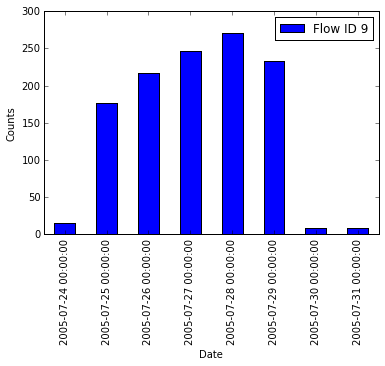

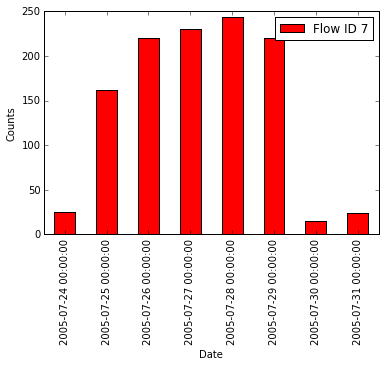

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
Orig_data= !cat CalIt2.data
Orig_data_sep = [Orig_data[i].split(',') for i in range(len(Orig_data))]
data_DF= pd.DataFrame(data=Orig_data_sep, columns=['FlowID', 'Date', 'Time', 'Count'])
####Selecting the data for month of July 2005 using the function I wrote before####
data_DF_Aug = FI_Counts_Range('2005-07-01', '2005-07-31', data_DF)
####Selecting the data with FlowID 7 and 9####
data_DF_Aug_FI7 = data_DF_Aug.loc[data_DF_Aug['FlowID']=='7']
data_DF_Aug_FI9 = data_DF_Aug.loc[data_DF_Aug['FlowID']=='9']
####Converting the columns to integer####
data_DF_Aug_FI7[['FlowID','Count']]=data_DF_Aug_FI7[['FlowID','Count']].convert_objects(convert_numeric=True)
data_DF_Aug_FI9[['FlowID','Count']]=data_DF_Aug_FI9[['FlowID','Count']].convert_objects(convert_numeric=True)
####Grouping the data by date and summing up the counts per date####
data_DF_Aug_FI7_group = data_DF_Aug_FI7.groupby('Date',as_index=False)
data_DF_Aug_FI7_group_sum = data_DF_Aug_FI7_group.sum()
data_DF_Aug_FI9_group = data_DF_Aug_FI9.groupby('Date',as_index=False)
data_DF_Aug_FI9_group_sum = data_DF_Aug_FI9_group.sum()

####plotting the histogram (bar plots) for count versus date for each Flow ID####
plt.figure()
data_DF_Aug_FI9_group_sum.plot(x='Date',y='Count',kind='bar',label='Flow ID 9').set_ylabel("Counts")
data_DF_Aug_FI7_group_sum.plot(x='Date',y='Count',kind='bar',label='Flow ID 7', color='r').set_ylabel("Counts")
